# Code to determine best combination of Time Shift and Rolling Sum for Classification and Linear Models

## Import Packages

In [1]:
# import_notebooks is a custom python script
# this line makes it possible to import functions from other IPython notebooks
from import_notebooks import *

In [2]:
# Here we import all the functions (*) from these notebooks
from Hainan_Data_Cleaning import *
from time_shift_dataframe import *
from Stratified_Split import *
from Cumulative import *
from Rollingsum import *
from LR_model import *
from Classification_Functions import *
from nn_model_keras import *
from Looping_Function import *

from Utilities import *

importing Jupyter notebook from Hainan_Data_Cleaning.ipynb
importing Jupyter notebook from time_shift_dataframe.ipynb
importing Jupyter notebook from Stratified_Split.ipynb
importing Jupyter notebook from Cumulative.ipynb
importing Jupyter notebook from Rollingsum.ipynb
importing Jupyter notebook from LR_model.ipynb


C:\Users\molin\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


importing Jupyter notebook from Classification_Functions.ipynb
importing Jupyter notebook from nn_model_keras.ipynb


C:\Users\molin\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
Using TensorFlow backend.


importing Jupyter notebook from Looping_Function.ipynb
importing Jupyter notebook from Utilities.ipynb


## Import Data and Perform Optimal Feature Engineering

In [3]:
df = load_hainan_data()

In [4]:
df['Sum1'] = df.ChineseMedicineWaste + df.AlcoholWaste + df.EnergyGrass + df.BananaFruitShafts + df.LemonWaste
df['Sum2'] = df.FishWastewater + df.TeaWaste + df.ChickenWaste
df['Sum3'] = df.PAM + df.Defoamer + df.Other

In [5]:
df_rohan = df.drop(['ChineseMedicineWaste', 'AlcoholWaste', 'EnergyGrass','BananaFruitShafts', 'LemonWaste',
       'FishWastewater', 'TeaWaste', 'ChickenWaste','PAM',
       'Defoamer', 'Other'], axis=1)

In [6]:
df_rohan_relfeatures = df_rohan.drop(['Year', 'Month', 'Day','BioCNG', 'LiquidFertilizer',
       'SolidFertilizer', 'WasteWater', 'SolidResidues','ProjectElectricity',
       'OfficeElectricity', 'Water', 'Diesel'], axis=1)
df_rohan_relfeatures = df_rohan_relfeatures.apply(pd.to_numeric, errors='coerce')
df_rohan_relfeatures = df_rohan_relfeatures.dropna()

## Loop over time shift and rolling sum

In [7]:
time_shift_min=15
time_shift_max=40
time_bucket_min=20
time_bucket_max=40
'''
pd_test_error_rf = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 1, run_dt = 0, run_log = 0, run_xgb = 0, run_linreg = 0, run_lass = 0, run_ridg = 0, alpha=0.5)
pd_test_error_dt = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 1, run_log = 0, run_xgb = 0, run_linreg = 0, run_lass = 0, run_ridg = 0, alpha=0.5)
pd_test_error_log = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 0, run_log = 1, run_xgb = 0, run_linreg = 0, run_lass = 0, run_ridg = 0, alpha=0.5)
pd_test_error_linreg = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 0, run_log = 0, run_xgb = 0, run_linreg = 1, run_lass = 0, run_ridg = 0, alpha=0.5)
pd_test_error_lasso = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 0, run_log = 0, run_xgb = 0, run_linreg = 0, run_lass = 1, run_ridg = 0, alpha=0.5)
pd_test_error_ridge = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 1, run_log = 0, run_xgb = 0, run_linreg = 0, run_lass = 0, run_ridg = 1, alpha=0.5)
'''
pd_test_error_nb = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 0, run_log = 0, run_xgb = 0, run_linreg = 0, run_lass = 0, run_ridg = 0, run_nb = 1,
                        alpha=0.5)
pd_test_error_xgb = loop(df_rohan_relfeatures,time_shift_min=time_shift_min, time_shift_max=time_shift_max, 
                        time_bucket_min=time_bucket_min, time_bucket_max=time_bucket_max, num_buckets=10, 
                        output_var='RawBiogas', 
                        run_rf = 0, run_dt = 0, run_log = 0, run_xgb = 1, run_linreg = 0, run_lass = 0, run_ridg = 0, run_nb = 0,
                        alpha=0.5)


Code Running for time shift 15 please wait...
Code Running for time shift 16 please wait...
Code Running for time shift 17 please wait...
Code Running for time shift 18 please wait...
Code Running for time shift 19 please wait...
Code Running for time shift 20 please wait...
Code Running for time shift 21 please wait...
Code Running for time shift 22 please wait...
Code Running for time shift 23 please wait...
Code Running for time shift 24 please wait...
Code Running for time shift 25 please wait...
Code Running for time shift 26 please wait...
Code Running for time shift 27 please wait...
Code Running for time shift 28 please wait...
Code Running for time shift 29 please wait...
Code Running for time shift 30 please wait...
Code Running for time shift 31 please wait...
Code Running for time shift 32 please wait...
Code Running for time shift 33 please wait...
Code Running for time shift 34 please wait...
Code Running for time shift 35 please wait...
Code Running for time shift 36 ple

## Plot results

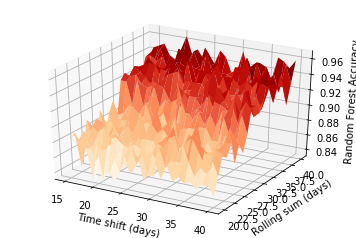

In [8]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(range(time_shift_min, time_shift_max+1))
y = np.array(range(time_bucket_min, time_bucket_max+1))
X, Y = np.meshgrid(x, y)
Z = np.array(pd_test_error_rf)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='OrRd')

ax.set_xlabel('Time shift (days)')
ax.set_ylabel('Rolling sum (days)')
ax.set_zlabel('Random Forest Accuracy')

plt.savefig('RF_loop.png')


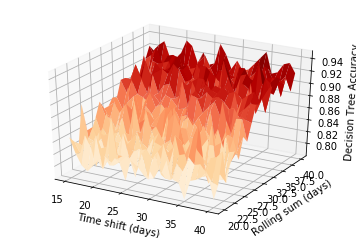

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(range(time_shift_min, time_shift_max+1))
y = np.array(range(time_bucket_min, time_bucket_max+1))
X, Y = np.meshgrid(x, y)
Z = np.array(pd_test_error_dt)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='OrRd')

ax.set_xlabel('Time shift (days)')
ax.set_ylabel('Rolling sum (days)')
ax.set_zlabel('Decision Tree Accuracy')

plt.savefig('DT_loop.png')

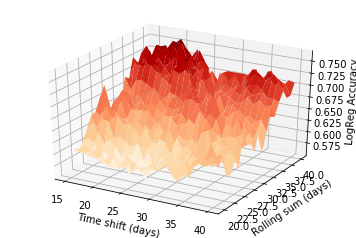

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(range(time_shift_min, time_shift_max+1))
y = np.array(range(time_bucket_min, time_bucket_max+1))
X, Y = np.meshgrid(x, y)
Z = np.array(pd_test_error_log)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='OrRd')

ax.set_xlabel('Time shift (days)')
ax.set_ylabel('Rolling sum (days)')
ax.set_zlabel('LogReg Accuracy')

plt.savefig('LogReg_loop.png')

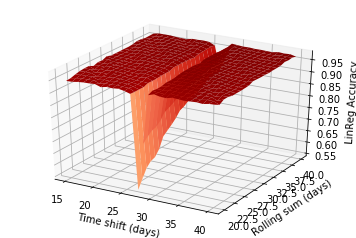

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(range(time_shift_min, time_shift_max+1))
y = np.array(range(time_bucket_min, time_bucket_max+1))
X, Y = np.meshgrid(x, y)
Z = np.array(pd_test_error_linreg)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='OrRd')

ax.set_xlabel('Time shift (days)')
ax.set_ylabel('Rolling sum (days)')
ax.set_zlabel('LinReg Accuracy')

plt.savefig('LinReg_loop.png')

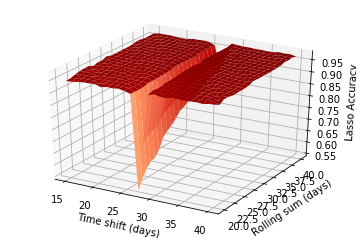

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(range(time_shift_min, time_shift_max+1))
y = np.array(range(time_bucket_min, time_bucket_max+1))
X, Y = np.meshgrid(x, y)
Z = np.array(pd_test_error_lasso)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='OrRd')

ax.set_xlabel('Time shift (days)')
ax.set_ylabel('Rolling sum (days)')
ax.set_zlabel('Lasso Accuracy')

plt.savefig('Lasso_loop.png')

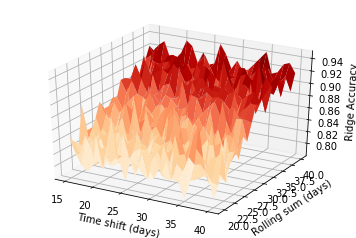

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
x = np.array(range(time_shift_min, time_shift_max+1))
y = np.array(range(time_bucket_min, time_bucket_max+1))
X, Y = np.meshgrid(x, y)
Z = np.array(pd_test_error_ridge)

ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='OrRd')

ax.set_xlabel('Time shift (days)')
ax.set_ylabel('Rolling sum (days)')
ax.set_zlabel('Ridge Accuracy')

plt.savefig('Ridge_loop.png')

In [8]:
df_rohan_relfeatures2 = df_rohan_relfeatures.drop(['Sum2', 'Sum3'], axis=1)

In [9]:
df_rohan_relfeatures2.columns.values

array(['RawBiogas', 'PigManure', 'Cassava', 'KitchenFoodWaste',
       'MunicipalFecalWaste', 'Bagasse', 'Percolate', 'NaOH', 'FeCl2',
       'Sum1'], dtype=object)

In [10]:
df_rohan_relfeatures.columns.values

array(['RawBiogas', 'PigManure', 'Cassava', 'KitchenFoodWaste',
       'MunicipalFecalWaste', 'Bagasse', 'Percolate', 'NaOH', 'FeCl2',
       'Sum1', 'Sum2', 'Sum3'], dtype=object)

In [14]:
df_ts = timeshift_df(df_rohan_relfeatures,17)
df_roll = rollingsum(df_ts,38)
np.random.seed(1337)
x_train_c, y_train_c, x_test_c, y_test_c, bins = test_train_for_classification(df_roll, num_buckets = 7)
test_error_rf = RandomForest(x_train_c, y_train_c, x_test_c, y_test_c)[0]
accuracy_rf = RandomForest(x_train_c, y_train_c, x_test_c, y_test_c)[1]
print(accuracy_rf)

0.974545454545


In [12]:
df_roll.shape

(1373, 12)

In [14]:
pd_test_error_linreg

,15,16,17,18,19,20,21,22,23,24,...,31,32,33,34,35,36,37,38,39,40
20,0.944447,0.945066,0.948551,0.950951,0.951388,0.952950,0.944887,0.949831,0.948905,0.951240,...,0.949802,0.948844,0.954625,0.953393,0.951179,0.953090,0.954478,0.952289,0.956867,0.958109
21,0.946372,0.950684,0.953104,0.953363,0.954724,0.945855,0.950554,0.949868,0.952464,0.950311,...,0.950930,0.956017,0.954895,0.953523,0.955519,0.956250,0.954752,0.958538,0.958338,0.948237
22,0.952397,0.954396,0.954991,0.955630,0.946853,0.951650,0.950749,0.954094,0.952455,0.951944,...,0.957086,0.956310,0.955394,0.958041,0.958027,0.957077,0.959507,0.959244,0.950243,0.959433
23,0.956807,0.957331,0.957284,0.948233,0.953253,0.952085,0.955549,0.953990,0.953250,0.947821,...,0.957460,0.956981,0.959706,0.959687,0.958072,0.959939,0.960161,0.952852,0.959890,0.960235
24,0.959005,0.958656,0.949123,0.954321,0.952529,0.956778,0.955100,0.954940,0.949749,0.948434,...,0.958039,0.960569,0.961264,0.959745,0.961952,0.961053,0.954489,0.960835,0.960970,0.955228
25,0.959323,0.949519,0.955480,0.953561,0.958603,0.956352,0.955768,0.950731,0.950729,0.950155,...,0.961983,0.962649,0.961735,0.964281,0.962752,0.955790,0.963229,0.962032,0.956914,0.955823
26,0.950784,0.956086,0.954677,0.960646,0.956919,0.957203,0.953008,0.952015,0.951693,0.956534,...,0.963772,0.963525,0.965632,0.964240,0.957044,0.964491,0.963754,0.958539,0.957296,0.955783
27,0.957298,0.955718,0.962144,0.957430,0.957850,0.954348,0.954015,0.953032,0.957949,0.956400,...,0.964811,0.966985,0.965797,0.958949,0.965580,0.964965,0.960825,0.958979,0.957723,0.956698
28,0.956276,0.963068,0.957989,0.958196,0.955481,0.955030,0.953336,0.958117,0.958387,0.956740,...,0.967987,0.966518,0.960319,0.967013,0.965959,0.962586,0.961365,0.959272,0.958411,0.958433
29,0.964067,0.958050,0.958607,0.956699,0.955929,0.954400,0.958551,0.959304,0.958724,0.957768,...,0.967285,0.961561,0.967717,0.967083,0.963883,0.963089,0.960837,0.959945,0.959205,0.966318
